In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras.models import load_model
from keras.preprocessing import image
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import csv

In [ ]:
data_csv='/contents/input/dataset/dataset.csv'
data1_dir = '/contents/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'
data2_dir = '/contents/input/deepfake-and-real-images/Dataset'
data3_dir = '/contents/input/hardfakevsrealfaces'
data4_dir = '/contents/input/real-and-fake-face-detection/real_and_fake_face'
data5_dir = '/coontents/input/real-vs-ai-generated-faces-dataset/dataset/dataset'

In [ ]:
if os.path.exists(data_csv):
    print('exists')
else:

    data_dirs = [ data5_dir, data4_dir]
    csv_file = 'dataset1.csv'
    data_csv=csv_file

    class_mapping = {
        'fake': 'Fake',
        'real': 'Real',
        'Fake': 'Fake',
        'Real': 'Real',
        'training_fake': 'Fake',
        'training_real': 'Real',
        '0':'Real',
        '1':'Fake'
    }

    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['image', 'label'])

        for data_dir in data_dirs:
            for root, dirs, files in os.walk(data_dir):
                for file in files:
                    if file.endswith('.jpg') or file.endswith('.png'):
                        image_path = os.path.join(root, file)

                        label = os.path.basename(root)

                        mapped_label = class_mapping.get(label, label)

                        writer.writerow([image_path, mapped_label])


In [ ]:
target_size = (150, 150)

In [ ]:
df = pd.read_csv(data_csv)

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [ ]:
data_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='label',
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42,
    subset='training'
)

Found 98396 validated image filenames belonging to 2 classes.


In [ ]:
validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col='label',
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 24599 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(target_size[0],target_size[1], 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(Learning_rate=0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 18, 18, 128)      

In [ ]:
history = model.fit(data_generator,batch_size=32,epochs=25,validation_data=validation_generator)

Epoch 1/25
3075/3075 [==============================] - 345s 112ms/step - loss: 0.5284 - accuracy: 0.7325 - val_loss: 0.3993 - val_accuracy: 0.8238
Epoch 2/25
3075/3075 [==============================] - 328s 107ms/step - loss: 0.3800 - accuracy: 0.8353 - val_loss: 0.3424 - val_accuracy: 0.8520
Epoch 3/25
3075/3075 [==============================] - 334s 109ms/step - loss: 0.3111 - accuracy: 0.8711 - val_loss: 0.2926 - val_accuracy: 0.8854
Epoch 4/25
3075/3075 [==============================] - 329s 107ms/step - loss: 0.2675 - accuracy: 0.8927 - val_loss: 0.2413 - val_accuracy: 0.9040
Epoch 5/25
3075/3075 [==============================] - 330s 107ms/step - loss: 0.2370 - accuracy: 0.9057 - val_loss: 0.2341 - val_accuracy: 0.9085
Epoch 6/25
3075/3075 [==============================] - 323s 105ms/step - loss: 0.2167 - accuracy: 0.9151 - val_loss: 0.2120 - val_accuracy: 0.9189
Epoch 7/25
3075/3075 [==============================] - 326s 106ms/step - loss: 0.2005 - accuracy: 0.9226 - val_

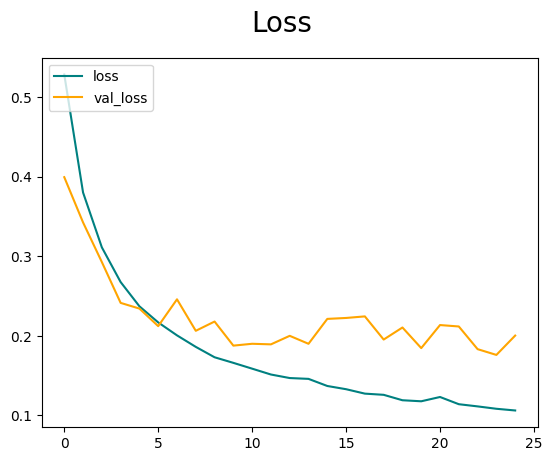

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

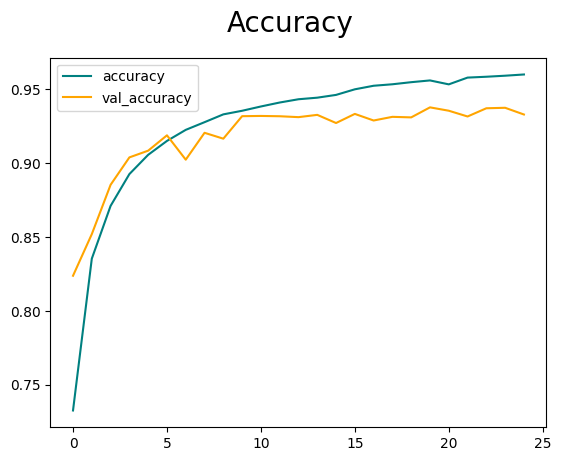

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()